<a href="https://colab.research.google.com/github/noambassat/SupremeCourtClassifier/blob/main/8_Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
file_path = "/content/drive/MyDrive/"
data_name  = "full_rap_df_cleaned_3_classifiers.xlsx"

In [5]:
data = pd.read_excel(file_path + data_name)

# Classifier's Statistics

In [6]:
def plot_statistics(data, col, quest):
    # ספירת המקרים השונים בעמודה
    value_counts = data[col].value_counts()
    print(value_counts)
    # יצירת הגרף
    plt.figure(figsize=(10, 5))
    plt.pie(value_counts, labels=quest, autopct='%1.1f%%', startangle=90)
    plt.title(f'Distribution of {col}')
    plt.show()

    # הדפסת הנתונים מתחת לגרף
    print(f"Data distribution for '{col}':")

    total = sum(map(lambda count: count, value_counts))

    print(f"Total of {total} cases where checked.")

Others_classifier_treshold_prediction
0    5983
1    1115
Name: count, dtype: int64


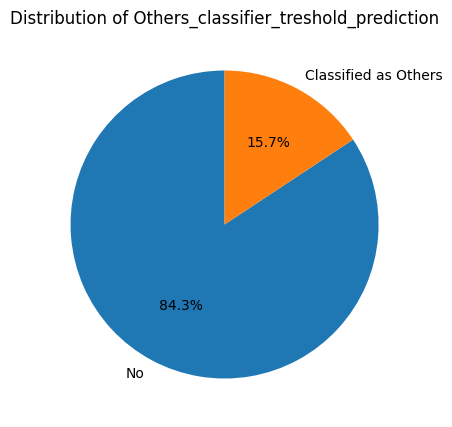

Data distribution for 'Others_classifier_treshold_prediction':
Total of 7098 cases where checked.


In [7]:
plot_statistics(data,'Others_classifier_treshold_prediction',['No','Classified as Others'])

first_classifier_treshold_prediction
0.0    5690
1.0     293
Name: count, dtype: int64


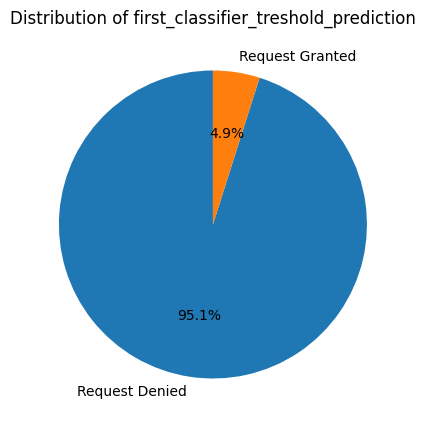

Data distribution for 'first_classifier_treshold_prediction':
Total of 5983 cases where checked.


In [8]:
plot_statistics(data,'first_classifier_treshold_prediction',['Request Denied','Request Granted'])

second_classifier_treshold_prediction
1.0    156
0.0    137
Name: count, dtype: int64


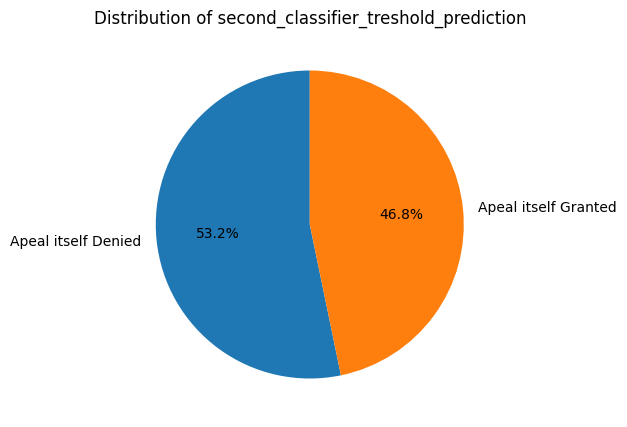

Data distribution for 'second_classifier_treshold_prediction':
Total of 293 cases where checked.


In [9]:
plot_statistics(data,'second_classifier_treshold_prediction',['Apeal itself Denied','Apeal itself Granted'])

# Add public and private sides

In [10]:
sides_path = "sides_values with lables.xlsx"
sides_df = pd.read_excel(file_path+sides_path)

In [11]:
sides_df["Public Sides"].unique()[5]

' באמצעות השירות המשפטי של עיריית תל אביב'

In [12]:
sides_df["Private Sides"].unique()[5]

'   ניקולאי טיטוב  ויקטור שניידרמן  אלכסיי וולוביק'

In [50]:
# ניקוי טקסט
def clean_text(value):
    if not isinstance(value, str):
        return ""
    # הסרת תווים לא רצויים
    value = re.sub(r'\s+', ' ', value).strip()
    # שמירת אותיות בעברית ואנגלית, רווחים, מספרים, נקודות ופסיקים
    value = re.sub(r'[^\w\s.,א-ת]', '', value)
    return value

# בדיקת ריק
def is_empty(value):
    return pd.isna(value) or not str(value).strip()

# זיהוי צד ציבורי
def publc_side(value):
    # ניקוי הטקסט
    value = clean_text(value)

    # רשימת תתי-מחרוזות לחיפוש
    subs = [
        "רשות מקרקעי ישראל", "מדינת ", "מועצה ", "שירות ה", "היחידה הארצי", "מדינתישראל", "לאכיפת ", "הרשות ל",
        "חוף ", "המשרד ל", 'יועמ"ש', "המשפטי לממשלה", "מנהל מקרקעי", "פרקליטות", "שירות בתי הסוהר", 'שב"ס',
        'מע"מ', "מכס ", 'קמ"ט', "ועדת תכנון", "מרכז השלטון", "משטרה", "הסנגוריה הציבורית", "מינהל מקרקעי",
        "עירית ", "רשויות", "איגוד ערים", "עיריית ", "מדינת ישראל", "משרד ה", "מקרקעי ישראל", "שר ה",
        "שרת ה", "מועצת ", 'רנ"ג', "סרן", "מחוז ", "מ דינת ישראל", "שרות בתי הסוהר", 'סג"ם', "(במיל)",
        "(מיל)", "עריית ", "המחלקה לחקירת שוטרים", "יושבי ראש", "רשות ה", "אלוף ", 'יו"ר', "יושב ראש",
        "ראש עיריית", "ועדה", "צבא", "מפקד", "פיקוד", "משטרת", "משטרה"
    ]

    # בדיקה אם הערך ריק
    if is_empty(value):
        return None

    # בדיקה אם אחד מתתי-המחרוזות מופיע בטקסט
    if any(sub in value for sub in subs):
        return 1
    return 0

# ייחוס צד המדינה
def assign_state_side(value):
    side = publc_side(value)
    if side == 0:
        return "א"
    elif side == 1:
        return "ב"
    else:
        return "לא מוגדר"

In [25]:
check_nulls_b = data[data["צד ב'"].isna()]
check_nulls_b["צד א'"].unique()

array([], dtype=object)

In [26]:
data["צד ב'"] = data["צד ב'"].fillna("").astype(str)

In [51]:
data["צד המדינה"]= data["צד ב'"].apply(lambda x: assign_state_side(x))

In [52]:
data["צד המדינה"].unique()

array(['ב', 'א', 'לא מוגדר'], dtype=object)

In [53]:
# בדיקת הערכים הקיימים בעמודת "צד המדינה"
print("Unique values in 'צד המדינה':", data['צד המדינה'].unique())

# ניקוי רווחים מיותרים ובדיקת ערכים לא צפויים
data['צד המדינה'] = data['צד המדינה'].astype(str).str.strip()

# בדיקה חוזרת של הערכים הייחודיים
print("Cleaned unique values in 'צד המדינה':", data['צד המדינה'].unique())

# ווידוא שכל הערכים התואמים נמצאים
missing_labels = [label for label in ['א', 'ב', 'לא מוגדר'] if label not in data['צד המדינה'].unique()]
if missing_labels:
    print("Missing labels:", missing_labels)
else:
    print("All expected labels are present.")


Unique values in 'צד המדינה': ['ב' 'א' 'לא מוגדר']
Cleaned unique values in 'צד המדינה': ['ב' 'א' 'לא מוגדר']
All expected labels are present.


צד המדינה
ב           6901
א            141
לא מוגדר      56
Name: count, dtype: int64


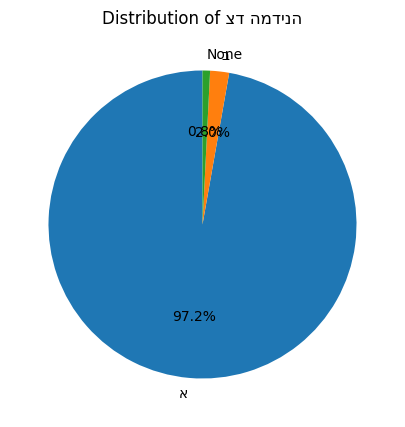

Data distribution for 'צד המדינה':
Total of 7098 cases where checked.


In [56]:
plot_statistics(data,'צד המדינה',['א','ב',"None"])

In [ ]:
data.to_excel(file_path + "full_rap_df_cleaned_3_classifiers_with_state's_side.xlsx", index=False)